# Lecture 10 - More Text Normalization and NLP

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import spacy

# Announcements:
* Data Ethics 2 - two articles to read and a short reflection to write by Wednesday


# Goals:
* Know the meaning and purpose of some basic text normalization operations (from natual language processing):
  * Sentence tokenization
  * Lowercasing, contractions, punctuation, canonicalization
  * Stemming
  * Lemmatization
  * Stopword removal
* Know how to use a Counter to count frequencies
* Understand the notion of a word vector and calculating similarity among words

* Get some hands-on practice using the above

### Tools for text normalization
- Python regular expressions (e.g., find and replace)
- Linux commandline tool `sed` (stream editor) or `tr` (translate)
- NLP toolkits; e.g., `spacy`, `nltk` (support tokenizing, stemming, lemmatizing, etc.)


In [2]:
nlp = spacy.load("en_core_web_sm")

### Counting Frequencies

In [3]:
quote = "You can please some of the people all of the time, you can please all of the people some of the time, but you can't please all of the people all of the time"

In [4]:
quote = quote.replace("can't", "can not")
quote

'You can please some of the people all of the time, you can please all of the people some of the time, but you can not please all of the people all of the time'

In [5]:
q = nlp(quote)

In [6]:
import collections

counts = collections.Counter([str(x) for x in q])

In [13]:
counts.most_common()

[('of', 6),
 ('the', 6),
 ('all', 4),
 ('can', 3),
 ('please', 3),
 ('people', 3),
 ('time', 3),
 ('some', 2),
 (',', 2),
 ('you', 2),
 ('You', 1),
 ('but', 1),
 ('not', 1)]

### Word Vectors and Similarity

Language models often have a way to map a word or token to a **vector** that, somehow, encodes the word's meaning in a bunch of numbers. These are often called **embedding vectors**, and we'll be seeing more about them later in the course.

But for now, let's just take a look at one thing this enables: similarity calculations.

The small language model we've been using (`en_core_web_sm`) does not have word vectors built into it, so we'll reach for a larger one that does. You can still compute similarities with the `_sm` model, but they won't be as intelligent.

The small model is now in the default JupyterHub environment, but the large one is not, so for the moment I have to do this:

In [14]:
!python -m spacy download en_core_web_lg

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 35.1 MB/s  0:00:09:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [15]:
nlp = spacy.load("en_core_web_lg")

In [16]:
words = "cat dog tiger king queen castle waffle pancake" 
ans = nlp(words)

Here's the word vector for "cat":

In [18]:
len(ans[0].vector)

300

That doesn't mean much to me, but if I use the `similarity` method, it will calculate how **similar** two words' vectors are.

Here's cat vs dog:

In [19]:
ans[0].similarity(ans[1])

0.8016854524612427

And here's cat vs waffle:

In [20]:
ans[1].similarity(ans[-1])

0.22979263961315155

Let's visualize the similaries among all eight of the words in our list:

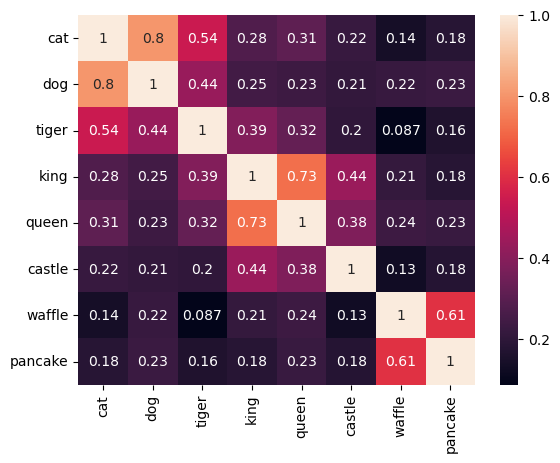

In [21]:
N = len(ans)
sim = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        sim[i,j] = ans[i].similarity(ans[j])

labels = words.split(" ")
sns.heatmap(sim, annot=True, xticklabels=labels, yticklabels=labels);